## Вариант 45. Галимзянов Дмитрий Сергеевич

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Задание 1

Найти разложение полного ранга и псевдообратную матрицу для 
\begin{align*}
    \begin{pmatrix} 
        4 & -15 & 10 \\
        3 & -11 & 8 \\
        -2 & 9 & -2 \\
        -1 & 5 & 0
    \end{pmatrix}
\end{align*}

### Решение
1. Приведем матрицу $A$ к ступенчатому виду по строкам
\begin{align*}
   \begin{pmatrix} 
        4 & -15 & 10 \\
        3 & -11 & 8 \\
        -2 & 9 & -2 \\
        -1 & 5 & 0
    \end{pmatrix} \sim
    \begin{pmatrix} 
        4 & -15 & 10 \\
        0 & \frac{5}{3} & \frac{10}{3} \\
        0 & 0 & 0 \\
        0 & 0 & 0
    \end{pmatrix} \sim
        \begin{pmatrix} 
        1 & 0 & 10 \\
        0 & 1 & 2 \\
        0 & 0 & 0 \\
        *0* & 0 & 0
    \end{pmatrix}
\end{align*}

$ $

2. $F$ составлена из столбцов с ведущими элементами $A$; $G$ составлена из ненулевых строк $A$

\begin{align*}
    F = 
    \begin{pmatrix}
        4 & -15 \\
        3 & -11 \\
        -2 & 9 \\
        -1 & 5
    \end{pmatrix}, \: 
    G = 
    \begin{pmatrix}
        1 & 0 & 10 \\
        0 & 1 & 2
    \end{pmatrix}
\end{align*}

Проверим, что разложение полного ранга найдено правильно

In [ ]:
A = np.array([
    [4, -15, 10],
    [3, -11, 8],
    [-2, 9, -2],
    [-1, 5, 0]
])

F = np.array([
    [4, -15],
    [3, -11],
    [-2, 9],
    [-1, 5]
])

G = np.array([
    [1, 0, 10],
    [0, 1, 2]
])

if np.allclose(A, F @ G):
    print("Correct")
else:
    print("Wrong")

Correct


3. Находим $F^{+}$. 

Так как столбцы линейно независимы, то $F^{+} = (F^{*} F)^{-1} F^{*}$. 


Далее,
\begin{align*}
    F^{*} F = 
    \begin{pmatrix}
        4 & 3 & -2 & -1 \\
        -15 & -11 & 9 & 5
    \end{pmatrix} 
    \begin{pmatrix}
        4 & -15 \\
        3 & -11 \\
        -2 & 9 \\
        -1 & 5
    \end{pmatrix} = 
    \begin{pmatrix}
        30 & -116 \\
        -116 & 452
    \end{pmatrix} 
\end{align*}

\begin{align*}
    (F^{*} F)^{-1} = 
    \frac{1}{52}
    \begin{pmatrix}
        226 & 58\\
        58 & 15
    \end{pmatrix}
\end{align*}

Таким образом,
\begin{align*}
    F^{+} = (F^{*} F)^{-1} F^{*} = \frac{1}{52}
    \begin{pmatrix}
        226 & 58 \\
        58 & 15
    \end{pmatrix}
    \begin{pmatrix}
        4 & 3 & -2 & -1 \\
        -15 & -11 & 9 & 5
    \end{pmatrix} = \frac{1}{52}
    \begin{pmatrix}
        34 & 40 & 70 & 64 \\
        7 & 9 & 19 & 17
    \end{pmatrix}
\end{align*}

Проверим правильность нахождения $F^{+}$

In [ ]:
np.linalg.pinv(F) * 52

array([[34., 40., 70., 64.],
       [ 7.,  9., 19., 17.]])

4. Находим $G^{+}$. 

Так как строки линейной независимы, то $G^{+} = G^{*} (G G^{*})^{-1}$. 

Далее,
\begin{align*}
    GG^{*} = 
    \begin{pmatrix}
        1 & 0 & 10 \\
        0 & 1 & 2
    \end{pmatrix} 
    \begin{pmatrix}
        1 & 0 \\
        0 & 1 \\
        10 & 2
    \end{pmatrix} = 
    \begin{pmatrix}
        101 & 20 \\
        20 & 5
    \end{pmatrix}
\end{align*}

\begin{align*}
    (GG^{*})^{-1} = 
    \frac{1}{21}
    \begin{pmatrix}
        1 & -4\\
        -4 & \frac{101}{5}
    \end{pmatrix} = 
    \frac{1}{105}
    \begin{pmatrix}
        5 & -20\\
        -20 & 101
    \end{pmatrix}
\end{align*}

Таким образом, 
\begin{align*}
    G^{+} = G^{*} (G G^{*})^{-1} = \frac{1}{105}
    \begin{pmatrix}
        1 & 0 \\
        0 & 1 \\
        10 & 2
    \end{pmatrix}
    \begin{pmatrix}
        5 & -20 \\
        -20 & 101
    \end{pmatrix} = \frac{1}{105}
    \begin{pmatrix}
        5 & -20 \\
        -20 & 101 \\
        10 & 2
    \end{pmatrix}
\end{align*}

Проверим правильность нахождения $G^{+}$

In [ ]:
np.linalg.pinv(G) * 105

array([[  5., -20.],
       [-20., 101.],
       [ 10.,   2.]])

5. $A = FG$

Поэтому
\begin{align*}
    A^{+} = G^{+} F^{+} = \frac{1}{5460}
    \begin{pmatrix}
        30 & 20 & -30 & -20 \\
        27 & 109 & 519 & 437 \\
        354 & 418 & 738 & 674
    \end{pmatrix}
\end{align*}

Проверим правильность нахождения $A^{+}$

In [ ]:
np.linalg.pinv(A) * 5460

array([[ 30.,  20., -30., -20.],
       [ 27., 109., 519., 437.],
       [354., 418., 738., 674.]])

### Ответ

1. \begin{align*}
    F = 
    \begin{pmatrix}
        4 & -15 \\
        3 & -11 \\
        -2 & 9 \\
        -1 & 5
    \end{pmatrix}, \: 
    G = 
    \begin{pmatrix}
        1 & 0 & 10 \\
        0 & 1 & 2
    \end{pmatrix}
\end{align*}

$ $

2. \begin{align*}
    A^{+} = \frac{1}{5460}
    \begin{pmatrix}
        30 & 20 & -30 & -20 \\
        27 & 109 & 519 & 437 \\
        354 & 418 & 738 & 674
    \end{pmatrix}
\end{align*}

## Задание 2

Среди всех приближений решения системы $Ax = b$ по методу наименьших квадратов найти решение наименьшей длины.

$$A = \begin{pmatrix}
3 & -7 & 9 & -9\\
-1 & 5 & 12 & 6\\
-2 & 8 & 11 & 15\\
4 & -10 & 4 & 0
\end{pmatrix},\:
b = \begin{pmatrix}
3\\
0\\
6\\
7
\end{pmatrix}$$

### Решение:
Имеем систему $Ax = b$. Решение по методу наименьших квадратов наименьшей длины находится как $x_0 = A^+b.$ Применяя алгоритм, продемонстрированный в Задании 1, посчитаем $A^+$ и умножим на $b$.

1. Приведем матрицу $A$ к ступенчатому виду по строкам
\begin{align*}
    \begin{pmatrix} 
        3 & -7 & 9 & -9\\
        -1 & 5 & 12 & 6\\
        -2 & 8 & 11 & 15\\
        4 & -10 & 4 & 0
    \end{pmatrix} \sim
    \begin{pmatrix}
        1 & 0 & 0 & 48 \\
        0 & 1 & 0 & 18 \\
        0 & 0 & 1 & -3 \\
        0 & 0 & 0 & 0
    \end{pmatrix}
\end{align*}

$ $

2. $F$ составлена из столбцов с ведущими элементами $A$; $G$ составлена из ненулевых строк $A$

\begin{align*}
    F = 
    \begin{pmatrix}
        3 & -7 & 9\\
        -1 & 5 & 12\\
        -2 & 8 & 11\\
        4 & -10 & 4
    \end{pmatrix}, \: 
    G = 
    \begin{pmatrix}
        1 & 0 & 0 & 48 \\
        0 & 1 & 0 & 18\\
        0 & 0 & 1 & -3
    \end{pmatrix}
\end{align*}

3. Проверим, что правильно нашли разложение полного ранга

In [ ]:
A = np.array([
    [3, -7, 9, -9], 
    [-1, 5, 12, 6], 
    [-2, 8, 11, 15], 
    [4, -10, 4, 0]
])

F = np.array([
    [3, -7, 9],
    [-1, 5, 12],
    [-2, 8, 11],
    [4, -10, 4]
])

G = np.array([
    [1, 0, 0, 48],
    [0, 1, 0, 18],
    [0, 0, 1, -3]
])

if np.allclose(A, F @ G):
    print("Correct")
else:
    print("Wrong")

Correct


4. Найдем псевдообратную матрицу:

$F^+ = (F^*F)^{-1}F^*$

$G^+ = G^*(GG^*)^{-1}$

$A^+ = G^+F^+$

5. Проверим правильность псевдообратных матриц

In [ ]:
F_pinv = np.linalg.inv(F.T @ F) @ F.T
G_pinv = G.T @ np.linalg.inv(G @ G.T)
A_pinv = G_pinv @ F_pinv

print(np.allclose(F_pinv, np.linalg.pinv(F)))
print(np.allclose(G_pinv, np.linalg.pinv(G)))
print(np.allclose(A_pinv, np.linalg.pinv(A)))

True
True
True


6. Найдем псевдорешение

In [ ]:
A = np.array([
    [3, -7, 9, -9], 
    [-1, 5, 12, 6], 
    [-2, 8, 11, 15], 
    [4, -10, 4, 0]
])

b = np.array([3, 0, 6, 7])

x0 = A_pinv @ b
print(x0)

[ 0.24425313 -0.59276801  0.17923225  0.51662954]


7. Проверим корректность псевдорешения

In [ ]:
def f(x):
    global A
    global b
    return np.linalg.norm(A @ x - b) ** 2

np.allclose(minimize(f, np.zeros(4)).x, x0)

True

### Ответ:

$x_{0} = 
\begin{pmatrix}
0.24425313 \\
-0.59276801\\
0.17923225\\
0.51662954
\end{pmatrix}$

## Задание 3

Построить график и выписать интерполяционный многочлен Лагранжа для функции, проходящей через четыре точки, координаты которых образуют столбцы матрицы
\begin{align*}
    \begin{pmatrix}
        -2 & -1 & 2 & 3 \\
        7 & 16 & 14 & 13
    \end{pmatrix}
\end{align*}

### Решение

1. Вычислим базисные полиномы 
\begin{align*}
    &I_{0}(x) = \frac{x - (-1)}{-2 - (-1)} \cdot \frac{x - 2}{-2 - 2} \cdot \frac{x - 3}{-2 - 3} = -\frac{(x+1)\cdot (x - 2) \cdot (x - 3)}{20} = -\frac{1}{20} \cdot (x^3 - 4x^2 + x + 6) \\
    &I_{1}(x) = \frac{(x + 2) \cdot (x - 2) \cdot (x - 3)}{12} = \frac{1}{12} \cdot (x^3 - 3x^2 - 4x + 12)\\  
    &I_{2}(x) = -\frac{(x + 2) \cdot (x + 1) \cdot (x - 3)}{-12} = -\frac{1}{12} \cdot (x^3 - 7x - 6)\\    
    &I_{3}(x) = \frac{(x + 2) \cdot (x + 1) \cdot (x - 2)}{20} = \frac{1}{20} \cdot (x^3 + x^2 - 4x - 4)
\end{align*}

2. Вычислим интерполяционный многочлен Лагранжа

\begin{align*}
    L(x) = \sum_{i = 0}^{3} y_i I_i(x)
\end{align*}

\begin{align*}
    L(x) = -\frac{7}{20} \cdot (x^3 - 4x^2 + x + 6) + \frac{16}{12} \cdot (x^3 - 3x^2 - 4x + 12) - \frac{14}{12} \cdot (x^3 - 7x - 6) + \frac{13}{20} \cdot (x^3 + x^2 - 4x - 4)
\end{align*}

\begin{align*}
    L(x) = \frac{7}{15} \cdot x^3 - \frac{39}{20} \cdot x^2 - \frac{7}{60} \cdot x + \frac{183}{10}
\end{align*}

3. Построим график

In [ ]:
def poly(x):
    return 7 / 15 * (x ** 3) - 39 / 20 * (x ** 2) - 7 / 60 * x + 183 / 10

X = np.array([-2, -1, 2, 3])
Y = np.array([7, 16, 14, 13])

x_linspace = np.linspace(-3, 4, 1_000)
y_linspace = poly(x_linspace)

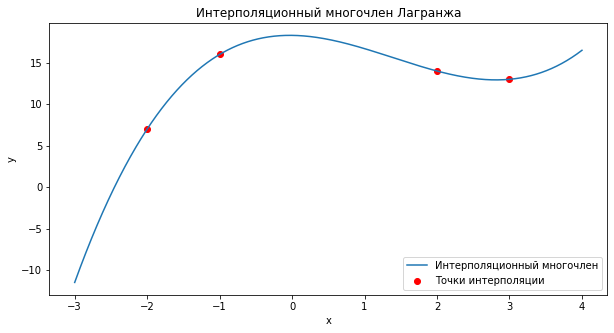

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Интерполяционный многочлен Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_linspace, y_linspace, label='Интерполяционный многочлен')
plt.scatter(X, Y, c='red', label='Точки интерполяции')
plt.legend()
plt.show()

### Ответ:

\begin{align*}
    L(x) = \frac{7}{15} \cdot x^3 - \frac{39}{20} \cdot x^2 - \frac{7}{60} \cdot x + \frac{183}{10}
\end{align*}

## Задание 4

Построить график и найти (параметрически) уравнение кривой Безье, 
заданной четырьмя точками, координаты которых образуют столбцы матрицы

\begin{align*}
P =
    \begin{pmatrix} 
        3 & 6 & 8 & 9\\
        8 & 9 & 4 & 2
    \end{pmatrix}
\end{align*}

### Решение:

1. Запишем уравнение кривой Безье

\begin{align*}
    B(t) = \sum_{i = 0}^{n} \binom{n}{i}(1 - t)^{n-i} t^i P_{i}
\end{align*}

2. Выпишем опорные точки кривой Безье:

$P_{0}$ = (3, 8)

$P_{1}$ = (6, 9)

$P_{2}$ = (8, 4)

$P_{3}$ = (9, 2)

$ $

3. В нашем случае: **n = 3**

\begin{align*}
    B(t) = \sum_{i = 0}^{3} \binom{n}{i}(1 - t)^{n-i} t^i P_{i}
\end{align*}

\begin{align*}
    B(t) =  \binom{3}{0}(1 - t)^{3} P_{0} + \binom{3}{1}(1 - t)^{2} t P_{1} + \binom{3}{2}(1 - t) t^2 P_{2} + \binom{3}{3}t^3 P_{3}
\end{align*}

\begin{align*}
    B(t) =  (1 - t)^{3} P_{0} + 3(1 - t)^{2} t P_{1} + 3(1 - t) t^2 P_{2} + t^3 P_{3}
\end{align*}

4. Подставляем $P_{i}$:
\begin{align*}
B(t) =
\begin{pmatrix} 
        (1 - t)^{3} 3 + 3(1 - t)^{2} t \cdot 6 + 3(1 - t) t^2 \cdot 8 + t^3 \cdot 9\\
        (1 - t)^{3} 8 + 3(1 - t)^{2} t \cdot 9 + 3(1 - t) t^2 \cdot 4 + t^3 \cdot 2
    \end{pmatrix} 
\end{align*}

\begin{align*}
B(t) =
\begin{pmatrix} 
        3(1 - t)^{3} + 18(1 - t)^{2} t + 24(1 - t) t^2 + 9 t^3\\
        8(1 - t)^{3} + 27(1 - t)^{2} t + 12(1 - t) t^2 + 2 t^3
    \end{pmatrix}
\end{align*}

5. Построим график

In [ ]:
def Bezier(t):
    x = 3*(1 - t)**3 + 18*(1 - t)**2 * t + 24*(1 - t)*t**2 + 9*t**3
    y = 8*(1 - t)**3 + 27*(1 - t)**2 * t + 12*(1 - t)*t**2 + 2*t**3
    return (x, y)

X = np.array([3, 6, 8, 9])
Y = np.array([8, 9, 4, 2])

t_linspace = np.linspace(0, 1, 1_000)
x_linspace, y_linspace = Bezier(t_linspace)

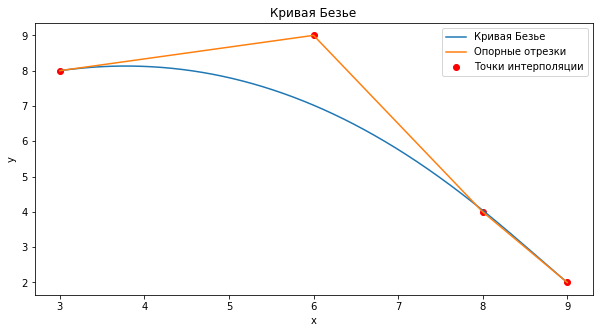

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Кривая Безье')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_linspace, y_linspace, label='Кривая Безье')
plt.plot(X, Y, label="Опорные отрезки")
plt.scatter(X, Y, c='red', label='Точки интерполяции')
plt.legend()
plt.show()

### Ответ:

\begin{align*}
B(t) =
\begin{pmatrix} 
        3(1 - t)^{3} + 18(1 - t)^{2} t + 24(1 - t) t^2 + 9 t^3\\
        8(1 - t)^{3} + 27(1 - t)^{2} t + 12(1 - t) t^2 + 2 t^3
    \end{pmatrix}
\end{align*}

## Задание 5

Для многочлена

\begin{align*}
f(x) = x^3 + 3x^2 − 4x + 5 
\end{align*}

найти наилучшее приближение по
max-норме многочленом степени $2$ на отрезке $[ -1 , 2 ]$

### Решение:

max-норма: $|h|_{0} = max_{[a, b]}|h(x)|$


Согласно следствию из теоремы Чебышёва, наименьшим уклоняющимся от $0$ на $[a, b]$ многочленом степени $n$ является многочлен 

\begin{align*}
    \overline{T}_{n}(x) = \frac{(b - a)^n}{2^{2n - 1}} T_{n}(\frac{2x - (b + a)}{b - a})
\end{align*}

Следовательно, искомый многочлен $g(x)$:

\begin{align*}
    g(x) = f(x) - C_{0} \overline{T}_{n}(x)
\end{align*}

где $C_{0}$ коэффициент при старшем члене $f(x)$

$ $

В нашем случае: 
$n = 3\\
a = -1\\ 
b = 2\\
C_{0} = 1 $

Вычислим $\overline{T}_{3}(x)$:

\begin{align*}
    \overline{T}_{3}(x) = \frac{(2 - (-1))^3}{2^{2*3 - 1}} T_{3}(\frac{2x - (2 + (-1))}{2 - (-1)})
\end{align*}

\begin{align*}
    \overline{T}_{3}(x) = \frac{3^3}{2^5} T_{3}(\frac{2x - 1}{3})
\end{align*}

Напомним, что
\begin{align*}
    {T}_{3}(x) = 4x^3 - 3x
\end{align*}

Тогда:

\begin{align*}
    \overline{T}_{3}(x) = x^3 + \frac{3}{2}x^2 - \frac{15}{16}x + \frac{31}{32}
\end{align*}

Искомый многочлен $g(x)$:

\begin{align*}
    g(x) = x^3 + 3x^2 − 4x + 5 - (x^3 + \frac{3}{2}x^2 - \frac{15}{16}x + \frac{31}{32})
\end{align*}

\begin{align*}
    g(x) = 1.5x^2 - \frac{49}{16}x + \frac{129}{32}
\end{align*}

### Ответ:

\begin{align*}
    g(x) = 1.5x^2 - \frac{49}{16}x + \frac{129}{32}
\end{align*}

## Задание 6

Построить многочлен степени ≤ 3, аппроксимирующий функцию 
$f(x) = \sqrt{2x + 4}$ на отрезке $[1, 6]$ по норме:

$|h|_{T} = \sqrt{\int_1^6\frac{h(x)^2}{\sqrt{1 - (2x - 7)^2/25}}dx}$

### Решение:

1. Заметим, что:

$\frac{(2x - 7)^2}{25} = (\frac{(2x - (1 + 6))}{6 - 1})^2 = (\frac{(2x - (a + b))}{b - a})^2$

$ $

2. Сделаем замену $y = \frac{2x - 7}{5} \implies x = \frac{5y + 7}{2}$

Отрезок $[1, 6]$ перейдет в $[-1, 1]$

$f(y) = \sqrt{5y + 11}$

$|h|_T = \sqrt{\int_{-1}^{1} \frac{h(y)^2}{\sqrt{1 - y^2}} dx}$

Ответом будет ортогональная проекция функции $f(y)$ на подпространство, базисом которого являются многочлены Чебышёва первого рода:

$p(x) = \lambda_0 T_0 + \ldots + \lambda_3 T_3$, где $\lambda_j = \frac{\langle f, T_j \rangle}{\langle T_j, T_j \rangle}$ 

Метрика индуцируется скалярным произведением:

$\langle f, g \rangle = \int_{-1}^{1} \frac{f(y)g(y)}{\sqrt{1 - y^2}} dy$ .

$ $

3. Многочлены Чебышёва:
\begin{align*}
    &T_{0}(x) = 1 \\
    &T_{1}(x) = x \\
    &T_{2}(x) = 2x^2 - 1 \\
    &T_{3}(x) = 4x^3 - 3x
\end{align*}

$ $

4. Посчитаем скалярные произведения $\langle T_j, T_j \rangle$
\begin{align*}
    &\langle T_0, T_0 \rangle = \int_{-1}^{1} \frac{1}{\sqrt{1 - x^2}} dx = \pi \\
    &\langle T_1, T_1 \rangle = \int_{-1}^{1} \frac{x^2}{\sqrt{1 - x^2}} dx = \frac{\pi}{2} \\
    &\langle T_2, T_2 \rangle = \int_{-1}^{1} \frac{(2x^2 -1)^2}{\sqrt{1 - x^2}} dx = \frac{\pi}{2} \\
    &\langle T_3, T_3 \rangle = \int_{-1}^{1} \frac{(4x^3 - 3x)^2}{\sqrt{1 - x^2}} dx = \frac{\pi}{2} \\
\end{align*}

5. Посчитаем скалярные произведения $\langle f, T_j \rangle$
\begin{align*}
    &\langle f, T_0 \rangle = \int_{-1}^{1} \frac{\sqrt{5x + 11}}{\sqrt{1 - x^2}} dx \approx 10.2778\\
    &\langle f, T_1 \rangle = \int_{-1}^{1} \frac{x \cdot \sqrt{5x + 11}}{\sqrt{1 - x^2}} dx \approx 1.20891 \\
    &\langle f, T_2 \rangle = \int_{-1}^{1} \frac{(2x^2 - 1) \cdot \sqrt{5x + 11}}{\sqrt{1 - x^2}} dx \approx -0.0721231 \\
    &\langle f, T_3 \rangle = \int_{-1}^{1} \frac{(4x^3 - 3x) \cdot \sqrt{5x + 11}}{\sqrt{1 - x^2}} dx \approx 0.00863724 \\
\end{align*}

6. Посчитаем $\lambda_i$

$\lambda_0 = \frac{10.2778}{\pi} \approx 3.27153$

$\lambda_1 = \frac{1.20891}{\frac{\pi}{2}} \approx 0.769616$

$\lambda_2 = \frac{−0.0721231}{\frac{\pi}{2}} \approx -0.0459150$

$\lambda_3 = \frac{0.00863724}{\frac{\pi}{2}} \approx 0.00549864$


7. Запишем многочлен
\begin{align*}
    &p(y) \approx 3.27153 \cdot T_0(y) + 0.769616 \cdot T_1(y) - 0.0459150 \cdot T_2(y) + 0.00549864 \cdot T_3(y)\\
    &p(y) \approx 0.0219946 y^3 - 0.09183 y^2 + 0.75312 y + 3.31745 
\end{align*}

8. Выполним обратную замену

\begin{align*}
    &p(y) = p(\frac{2x - 7}{5}) \approx 0.0219946 (\frac{2x - 7}{5})^3 - 0.09183 (\frac{2x - 7}{5})^2 + 0.75312 (\frac{2x - 7}{5}) + 3.31745\\
    &p(x) = 0.00140765 x^3 - 0.0294732 x^2 + 0.455829 x + 2.02274
\end{align*}

9. Проверим аппроксимирующий многочлен на графике

In [ ]:
def poly(x):
    return 0.00140765 * x**3 - 0.0294732 * x**2 + 0.455829*x + 2.02274

def f(x):
    return np.sqrt(2 * x + 4)

In [ ]:
x = np.linspace(-2, 10, 1_000)
poly_values = poly(x)
f_values = f(x)

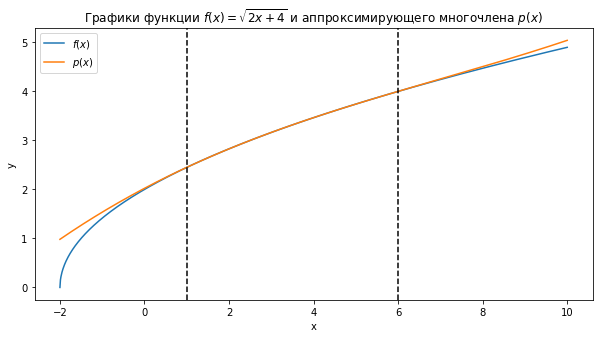

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Графики функции $f(x) = \sqrt{2x + 4}$ и аппроксимирующего многочлена $p(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, f_values, label='$f(x)$')
plt.plot(x, poly_values, label='$p(x)$')
plt.axvline(x=1, color='k', linestyle='--')
plt.axvline(x=6, color='k', linestyle='--')
plt.legend()
plt.show()

### Ответ:

$p(x) = 0.00140765 x^3 - 0.0294732 x^2 + 0.455829 x + 2.02274$

$ $

## Задание 7

При каком значении $q$ уравнение $2x^2 + xz (6 - 4q) + y^2 (8q + 1) + z^2 (8q + 3) = 1$ задает единичную окружность относительно какой-то нормы в трехмерном пространстве? Найти норму вектора $(1, 1, 1)$ в зависимости от $q$.

### Решение

Запишем квадратичную форму в матричном виде 

\begin{align*}
    2x^2 + xz (6 - 4q) + y^2 (8q + 1) + z^2 (8q + 3) = 
        \begin{pmatrix}
            x & y & z
        \end{pmatrix}
        \begin{pmatrix}
            2 & 0 & 3 - 2q \\
            0 & 8q + 1 & 0 \\
            3 - 2q & 0 & 8q + 3
        \end{pmatrix}
        \begin{pmatrix}
            x \\
            y \\
            z
        \end{pmatrix}
\end{align*}

Нам нужно найти, когда матрица положительно определенная. Воспользуемся критерием Сильвестра:

$ $

\begin{align*}
    &2 > 0 \\
    &2 \cdot (8q + 1) > 0 \implies q > -\frac{1}{8} \\
    &2 \cdot (8q + 1) \cdot (8q + 3) - (3 - 2q)^2 \cdot (8q + 1) > 0 \implies (8q + 1) (4q^2 - 28q + 3) < 0 \implies q \in \left(-\infty, -\frac{1}{8} \right) \cup \left(\frac{1}{2} (7 - \sqrt{46}), \frac{1}{2} (7 + \sqrt{46})\right)
\end{align*}

Таким образом, $$q \in \left(\frac{1}{2} (7 - \sqrt{46}), \frac{1}{2} (7 + \sqrt{46})\right)$$.

### Ответ
1. $$q \in \left(\frac{1}{2} (7 - \sqrt{46}), \frac{1}{2} (7 + \sqrt{46})\right)$$
2. $$12 (q + 1)$$

## Задание 8 

Найти наилучшее приближение $A_{1}$ ранга $2$ матрицы $A$ по норме $|| · ||_{2}$
и вычислить $||A − A_{1}||_{2}$, где

\begin{align*}
A =
    \begin{pmatrix} 
        27 & -128 & -20 & 8\\
        -90 & 44 & 8 & 76\\
        -18 & -34 & 56 & -80\\
    \end{pmatrix}
\end{align*}

### Решение:

1. Необходимо найти SVD-разложение матрицы

Для удобства будем искать разложение для $B = A^*$, а потом еще раз выполним сопряжение





In [ ]:
A = np.array([
    [27, -128, -20, 8],
    [-90, 44, 8, 76],
    [-18, -34, 56, -80]
])

B = A.T

In [ ]:
B

array([[  27,  -90,  -18],
       [-128,   44,  -34],
       [ -20,    8,   56],
       [   8,   76,  -80]])

Найдем собственные значения матрицы $B^*B$

In [ ]:
B.T @ B

array([[17577, -7614,  2106],
       [-7614, 15876, -5508],
       [ 2106, -5508, 11016]])

Найдем характеристический многочлен 

$-\lambda^3 + 44 469\lambda^2 - 554 824 404 \lambda + 2 008 387 814 976$

Корни характеристического многочлена

$\lambda_1 = 26244 $

$\lambda_2 = 11664 $

$\lambda_3 = 6561 $

$ $

Найдем собственные векторы

\begin{align*}
v_1 =
    \begin{pmatrix} 
        2\\
        -2\\
        1\\
    \end{pmatrix}
\end{align*}

\begin{align*}
v_2 =
    \begin{pmatrix} 
        -2\\
        -1\\
        2\\
    \end{pmatrix}
\end{align*}

\begin{align*}
v_3 =
    \begin{pmatrix} 
        1\\
        2\\
        2\\
    \end{pmatrix}
\end{align*}

$ $

Нормируем векторы

\begin{align*}
v_1 = \frac{1}{3}
    \begin{pmatrix} 
        2\\
        -2\\
        1\\
    \end{pmatrix}
\end{align*}

\begin{align*}
v_2 = \frac{1}{3}
    \begin{pmatrix} 
        -2\\
        -1\\
        2\\
    \end{pmatrix}
\end{align*}

\begin{align*}
v_3 = \frac{1}{3}
    \begin{pmatrix} 
        1\\
        2\\
        2\\
    \end{pmatrix}
\end{align*}

$ $

Найдем сингулярные значения

$\sigma_1 = 162$

$\sigma_2 = 108 $

$\sigma_3 = 81$

$ $

Составим матрицу $\sum$

\begin{align*}
\sum =
    \begin{pmatrix} 
        162 & 0 & 0\\
        0 & 108 & 0\\
        0 & 0 & 81\\
        0 & 0 & 0\\
    \end{pmatrix}
\end{align*}

$ $

Составим матрицу $V$

\begin{align*}
V = \frac{1}{3}
    \begin{pmatrix} 
        2 & -2 & 1\\
        -2 & -1 & 2\\
        1 & 2 & 2\\
    \end{pmatrix}
\end{align*}

$ $

Составим матрицу $U$

\begin{align*}
U = \frac{1}{9}
    \begin{pmatrix} 
        4 & 0 & -7 & 4\\
        -7 & 4 & -4 & 0\\
        0 & 4 & 4 & 7\\
        -4 & -7 & 0 & 4
    \end{pmatrix}
\end{align*}

Сингулярное разложение для матрицы $B$

\begin{align*}
    B = U \Sigma V^T = \frac{1}{3} \cdot \frac{1}{9} \cdot
        \begin{pmatrix} 
        4 & 0 & -7 & 4\\
        -7 & 4 & -4 & 0\\
        0 & 4 & 4 & 7\\
        -4 & -7 & 0 & 4
    \end{pmatrix}
        \begin{pmatrix}
            162 & 0 & 0 \\
            0 & 108 & 0\\
            0 & 0 & 81\\
            0 & 0 & 0
        \end{pmatrix}      
        \begin{pmatrix}
            2 & -2 & 1 \\
            -2 & -1 & 2 \\
            1 & 2 & 2
        \end{pmatrix}
\end{align*}

Выполним проверку

In [ ]:
U = 1 / 9 * np.array([
    [4, 0, -7, 4],
    [-7, 4, -4, 0],
    [0, 4, 4, 7],
    [-4, -7, 0, 4],
])

Sigma = np.array([
    [162, 0, 0],
    [0, 108, 0],
    [0, 0, 81],
    [0, 0, 0],
])

V = 1 / 3 * np.array([
    [2, -2, 1],
    [-2, -1, 2],
    [1, 2, 2]
])

np.allclose(U @ Sigma @ V.T, B)

True

Выполним сопряжение, чтобы получить разложение для матрицы A

\begin{align*}
    A = B^T = (U \Sigma V^T)^T = V \Sigma^T U^T = \frac{1}{3} \cdot \frac{1}{9} \cdot
    \begin{pmatrix}
            2 & -2 & 1 \\
            -2 & -1 & 2 \\
            1 & 2 & 2
        \end{pmatrix}
        \begin{pmatrix}
            162 & 0 & 0 & 0 \\
            0 & 108 & 0 & 0\\
            0 & 0 & 81 & 0\\
        \end{pmatrix}      
        \begin{pmatrix} 
        4 & -7 & 0 & -4\\
        0 & 4 & 4 & -7\\
        -7 & -4 & 4 & 0\\
        4 & 0 & 7 & 4
    \end{pmatrix}
\end{align*}


Выполним проверку

In [ ]:
np.allclose(V @ Sigma.T @ U.T, A)

True

Наилучшее приближение ранга $2$

\begin{align*}
    A_1 = \frac{1}{3} \cdot \frac{1}{9} \cdot
    \begin{pmatrix}
            2 & -2 & 1 \\
            -2 & -1 & 2 \\
            1 & 2 & 2
        \end{pmatrix}
        \begin{pmatrix}
            162 & 0 & 0 & 0 \\
            0 & 108 & 0 & 0\\
            0 & 0 & 0 & 0\\
        \end{pmatrix}      
        \begin{pmatrix} 
        4 & -7 & 0 & -4\\
        0 & 4 & 4 & -7\\
        -7 & -4 & 4 & 0\\
        4 & 0 & 7 & 4
    \end{pmatrix}
\end{align*}

\begin{align*}
    A_1 = 
        \begin{pmatrix}
            48 & -116 & -32 & 8\\
            -48 & 68 & -16 & 76\\
            24 & -10 & 32 & -80\\
        \end{pmatrix}
\end{align*}


Выполним проверку

In [ ]:
Sigma_new = np.array([
    [162, 0, 0],
    [0, 108, 0],
    [0, 0, 0],
    [0, 0, 0],
])


In [ ]:
(V @ Sigma_new.T @ U.T)

array([[  48., -116.,  -32.,    8.],
       [ -48.,   68.,  -16.,   76.],
       [  24.,  -10.,   32.,  -80.]])

$||A − A_{1}||_{2} = \sigma_3 = 81$

### Ответ:

1. \begin{align*}
    A_1 = 
        \begin{pmatrix}
            48 & -116 & -32 & 8\\
            -48 & 68 & -16 & 76\\
            24 & -10 & 32 & -80\\
        \end{pmatrix}
\end{align*}

$ $

2. \begin{align*}
    ||A − A_{1}||_{2} = \sigma_3 = 81
\end{align*}

## Задание 9

Оценить относительную погрешность приближенного решения $ x = (1, 1)$
системы $Ax = b$ по нормам $| · |_{1}$ и $| · |_{2}$ с помощью числа обусловленности матрицы $A$, где

\begin{align*}
A =
    \begin{pmatrix} 
        5.1 & 0.17 \\
        7.85 & -7.98
    \end{pmatrix}
\end{align*}

\begin{align*}
b =
    \begin{pmatrix} 
        4.88 \\
        -0.02
    \end{pmatrix}
\end{align*}

### Решение:

$x$ является точным решением системы при

\begin{align*}
\hat{A}  =
    \begin{pmatrix} 
        5 & 0 \\
        8 & -8
    \end{pmatrix}
\end{align*}


\begin{align*}
\hat{b} = 
    \begin{pmatrix} 
        5 \\
        0
    \end{pmatrix}
\end{align*}

Оценим относительную погрешность с помощью неравенства:

$\delta(x) \leq \chi(\hat{A}) \cdot (\delta(\hat{b}) + \delta(\hat{A}))$

где:

$\chi(\hat{A}) = || \hat{A} || \cdot || \hat{A}^{-1} || $

$\delta(\hat{A}) = \frac{|| \Delta\hat{A} ||}{|| \hat{A} ||}$

$|| \Delta\hat{A} || = || A - \hat{A} ||$

$\delta(\hat{b}) = \frac{| \Delta\hat{b} |}{| \hat{b} |}$

$| \Delta\hat{b} | = | b - \hat{b} |$

\begin{align*}
\hat{A}^{-1} =
    \begin{pmatrix} 
        0.2 & 0 \\
        0.2 & -0.125
    \end{pmatrix}
\end{align*}

$ $

\begin{align*}
\Delta\hat{A} = 
    \begin{pmatrix} 
        0.1 & 0.17 \\
        -0.15 & 0.02
    \end{pmatrix}
\end{align*}

\begin{align*}
\Delta\hat{b} = 
    \begin{pmatrix} 
        -0.12 \\
        -0.02
    \end{pmatrix}
\end{align*}

**1. Рассмотрим норму $| · |_{1}$**

$|x|_{1} = \sum |x_{i}|$

Индуцированная матричная норма:

$|| A ||_{1} = max_{1 \leq j \leq n}  \sum_{i=1}^{m} |a_{ij}|$

$ $

Тогда имеем:

$|| \hat{A} ||_{1} = 13$

$|| \Delta\hat{A} ||_{1} = 0.25$

$\delta(\hat{A}) = \frac{0.25}{13} \approx 0.019$

$ $

$|| \hat{A}^{-1} ||_{1} = 0.4$

$ $

$\chi(\hat{A}) = 13 \cdot 0.4 = 5.2$

$ $

$| \hat{b} |_{1} = 5$

$| \Delta\hat{b} |_{1} = 0.14$

$\delta(\hat{b}) = \frac{0.14}{5} = 0.028$

$ $

$\delta(x) \leq 5.2 \cdot (0.028 + 0.019)$

$\delta(x) \leq 0.047$

$ $

## Задание 10

Найти приближенно обратную матрицу к матрице $A$ и оценить погрешность приближения относительно равномерной нормы $|| · ||_{1}$ если элементы матрицы $A$ известны с абсолютной погрешностью $\varepsilon = 0.01$

\begin{align*}
A \approx
    \begin{pmatrix} 
        -9 & 2 \\
        9 & 3
    \end{pmatrix}
\end{align*}

**2. Рассмотрим норму $| · |_{2}$**

$|x|_{2} = \sqrt{\sum |x_{i}|^{2}}$

Индуцированная матричная норма:

$|| A ||_{2} = \sigma_{1}(A)$

$ $

2.1. Найдем $|| \hat{A} ||_{2} $

\begin{align*}
\hat{A}^{*}\hat{A} =
    \begin{pmatrix} 
        89 & -64 \\
        -64 & 64
    \end{pmatrix}
\end{align*}

Характеристическое уравнение:

$\lambda^2 -153 \lambda + 1600 = 0$

Из уравнения найдем максимальное собственное значение:

$\lambda_{max} = \frac{153 + \sqrt{17009}}{2} \approx 141.7$

Значит, 

$\sigma_{max} \approx 11.9$

$ $

2.2. Найдем $|| \Delta\hat{A} ||_{2} $

\begin{align*}
\Delta\hat{A}^{*}\Delta\hat{A} =
    \begin{pmatrix} 
        0.0325 & 0.014 \\
        0.014 & 0.0293
    \end{pmatrix}
\end{align*}

Характеристическое уравнение (умножим на $10^4$, чтобы получить целые коэффициенты):

$10^8\lambda^2 -618 \cdot 10^4 \lambda + 95223.31 = 0$

Из уравнения найдем максимальное собственное значение:

$\lambda_{max} = \frac{618 + \sqrt{1030.76}}{20000}$

Значит, 

$\sigma_{max} \approx 0.18$

$ $

2.3. Найдем $|| \hat{A}^{-1} ||_{2}$

\begin{align*}
(\hat{A}^{-1})^{*}{\hat{A}}^{-1} =
    \begin{pmatrix} 
        0.08 & -0.025 \\
        -0.025 & 0.015625
    \end{pmatrix}
\end{align*}

Характеристическое уравнение:

$\lambda^2 - 0.095625 \cdot \lambda + 0.000625 = 0$

$ \sqrt{D} \approx 0.0815$

Из уравнения найдем максимальное собственное значение:

$\lambda_{max} \approx 0.0885$

Значит, 

$\sigma_{max} \approx 0.2976$

$ $

Итого, имеем

$|| \hat{A} ||_{2} = 11.9$

$|| \Delta\hat{A} ||_{2} = 0.18$

$\delta(\hat{A}) = \frac{0.18}{11.9} \approx 0.015$

$ $

$|| \hat{A}^{-1} ||_{2} = 0.2976$

$ $

$\chi(\hat{A}) = 11.9 \cdot 0.2976 = 3.5414$

$ $

$| \hat{b} |_{2} = 5$

$| \Delta\hat{b} |_{2} \approx 0.1216$

$\delta(\hat{b}) = \frac{0.1216}{5} = 0.02432$

$ $

$\delta(x) \leq 3.5414 \cdot (0.02432 + 0.015)$

$\delta(x) \leq 0.139$

### Решение:

1. Оценим погрешность обратной матрицы по формуле:

$\delta(A^{-1}) \leq \frac{\chi(A) \delta(A)}{1 - \chi(A) \delta(A)}$

$ $

2. Так как $\varepsilon = 0.01$, то $||\Delta A||_{1} = 0.02$


3.  $||A||_{1} = 18$


4. $\delta(A) = \frac{||\Delta A||_{1}}{||A||_{1}} = \frac{0.02}{18} \approx 0.0011$

$ $

5. Найдем обратную матрицу:

\begin{align*}
A^{-1} =
    \begin{pmatrix} 
        -\frac{1}{15} & \frac{2}{45} \\
        \frac{2}{10} & \frac{2}{10}
    \end{pmatrix}
\end{align*}


6. $||A^{-1}||_{1} \approx 0.2444$


7. $\chi(A) = ||A||_{1} \cdot ||A^{-1}||_{1} = 18 \cdot 0.2444 = 4.4$

$ $

Тогда:

$\delta(A^{-1}) \leq \frac{4.4 \cdot 0.0011 }{1 - 4.4 \cdot 0.0011} = \frac{0.00484}{0.99516} \approx 0.0048 $